# Jonathan Halverson
# Wednesday, March 16, 2016
# Small sample hypothesis testing for a proportion

### People providing an organ for donation sometimes seek the help of a special “medical consultant”. These consultants assist the patient in all aspects of the surgery, with the goal of reducing the possibility of complications during the medical procedure and recovery. One consultant tried to attract patients by noting the average complication rate for liver donor surgeries in the US is about 10%, but her clients have only had 3 complications in the 62 liver donor surgeries she has facilitated.

### We first note that this is observational data so one may not say that there were fewer complications because of the consultant.

### Let's find out how likely the proportion of 3/62 is by chance if the null value is 1/10. The null hypothesis is that p = 0.1. The alternative is that p < 0.1.

### It's important to note that the success-failure condition is not met here because np = 62 * 0.1 = 6.2 which is less than 10. We begin with the numerical experiment and then work the problem analytically.

In [175]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

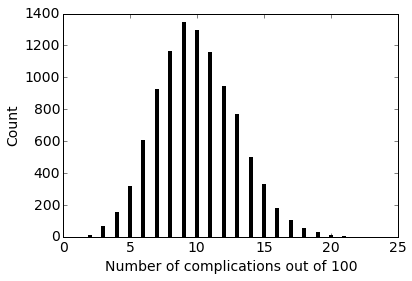

In [176]:
p_null = 0.1
trials = 10000
data = []
for _ in range(trials):
    complications = 0
    for _ in range(100):
        if random.random() < p_null: complications += 1
    data.append(complications)
from collections import Counter
cnt = Counter(data)
plt.vlines(x=cnt.keys(), ymin=np.zeros(len(cnt)), ymax=cnt.values(), lw=4)
plt.xlabel('Number of complications out of 100')
plt.ylabel('Count')

### The probability of having a proportion equal to or less than 3/62 is

In [177]:
p_hat = 3 / 62.0
print sum([1 for d in data if d / 100.0 <= p_hat]) / float(trials)

0.0242


### The binomial distribution can be used to model the problem. We are essentially asking how many successes does one find in n events if the probability of success is 0.1. A success is a patient with a complication here.

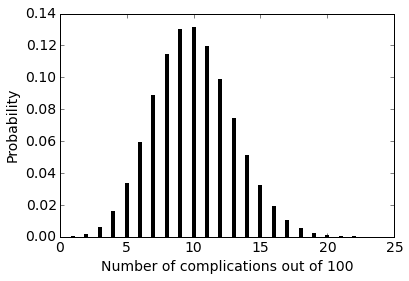

In [178]:
from scipy.stats import binom
plt.vlines(range(100), ymin=np.zeros(100), ymax=binom.pmf(k=range(100), p=0.1, n=100), lw=4)
plt.xlim(0, 25)
plt.xlabel('Number of complications out of 100')
plt.ylabel('Probability')

In [179]:
binom.cdf(k=int(100 * p_hat), p=0.1, n=100)

0.0237110826634769

### For fun let's see how the results vary with population size:

(0.0001, 1)

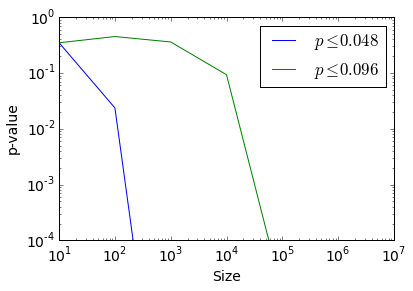

In [187]:
def sizes_cdfs(p_thres):
    sizes = [10**n for n in range(1, 8)]
    cdf = [binom.cdf(k=int(p_thres * size), p=0.1, n=size) for size in sizes]
    return sizes, cdf

plt.loglog(sizes_cdfs(p_hat)[0], sizes_cdfs(p_hat)[1], label=r'$p\leq 0.048$')
plt.loglog(sizes_cdfs(0.096)[0], sizes_cdfs(0.096)[1], label=r'$p\leq 0.096$')
plt.xlabel('Size')
plt.ylabel('p-value')
plt.legend(loc='upper right')
plt.ylim(1e-4, 1)

### Both curves begin at the same value which the probability of getting 0 on 10 events is $0.9^{10} \approx 0.35$.

### We see that the result depends on the size. For a size of 10, we find p-value > 0.05. For larger sizes and p_hat=3/63, we reject the null hypothesis. For p_hat = 0.096 = 6/62, we would fail to reject the null hypothesis until the sample size reached 1e5.